# 线性判别分析(Fisher's Linear Discriminant, FLD)

## 符号定义

|符号|定义|
|:-:|:-:|
|$\pmb{x}$|样本点|
|$N$|数据总数|
|$X$|样本集合|
|$l$|总类别数|
|$\pmb{m}$|均值向量|
|$y$|每一个样本点对应的类别|
|$\pmb{w}$|投影向量|
|$C$|协方差矩阵|
|$S$|散度矩阵|
|$k$|降维后维度|
|$\sigma$|每一个类降维后的标准差|
|$\mu$|每一个类降维后的均值向量|

## PCA的缺陷

PCA得到的降维总是向着最大化方差的方向进行投影，这一策略往往是有效的。直观上来说，向着最大化方差的方向投影显然能最大程度上离散原始的数据点，即使得降维后的数据尽量可分。

但是在一些极端情况下，这一策略可能会失效。对于细粒度数据，其类间差距小，而类内差距大，若依然向着最大化方差的方向进行降维，显然同类别的数据由于类内差距大而分离，不同类别的数据由于类间差距小而降维到相似的坐标。对于细粒度的数据，显然，同类别的数据降维后聚合到一起，不同类别的数据相互分离才是有效的降维结果

FLD正是这样一种能依靠已有数据进行监督降维的方法。类似于PCA，FLD也是一种线性的降维方法，因此其可以视为原数据点向某些方向进行投影

## 应用于二维二分类的FLD

对于分类问题，往往希望降维后同类数据聚合到一起，而不同类的数据分离。

这一描述显然涉及到两个关键问题
* 同类数据聚合到一起：每一类的方差尽可能小
* 不同类数据的距离尽可能大：类间平均距离大

那么FLD的目标就是：最小化类内方差，最大化类间间距（每一个类的期望的距离）

首先进行定义

* 正样本集合
$$
\begin{equation}
    X_1 = \{ \pmb{x_i}|1\leq i \leq N,\ y_i=1\}
\end{equation}
$$

* 负样本集合
$$
\begin{equation}
    X_2 = \{ \pmb{x_i}|1\leq i \leq N,\ y_i=2\}
\end{equation}
$$

* 对应的均值向量
$$
\begin{equation}
    \pmb{m_1} = \frac{1}{N_1}\sum_{\pmb{x}\in X_1}\pmb{x}
\end{equation}
$$
$$
\begin{equation}
    \pmb{m_2} = \frac{1}{N_2}\sum_{\pmb{x}\in X_2}\pmb{x}
\end{equation}
$$

* 对应的协方差矩阵
$$
\begin{equation}
    C_1 = \frac{1}{N_1}\sum_{\pmb{x} \in X_1}(\pmb{x}-\pmb{m_1})(\pmb{x}-\pmb{m_1})^T
\end{equation}
$$
$$
\begin{equation}
    C_2 = \frac{1}{N_2}\sum_{\pmb{x} \in X_2}(\pmb{x}-\pmb{m_2})(\pmb{x}-\pmb{m_2})^T
\end{equation}
$$

* 对应的散度矩阵
$$
\begin{equation}
    S_1 = \sum_{\pmb{x} \in X_1}(\pmb{x}-\pmb{m_1})(\pmb{x}-\pmb{m_1})^T = N_1C_1
\end{equation}
$$
$$
\begin{equation}
    S_2 = \sum_{\pmb{x} \in X_2}(\pmb{x}-\pmb{m_2})(\pmb{x}-\pmb{m_2})^T= N_2C_2
\end{equation}
$$

* 对应的均值降维结果
$$
\begin{equation}
    \mu_1 = \pmb{m_1}^T\pmb{w}
\end{equation}
$$
$$
\begin{equation}
    \mu_2 = \pmb{m_2}^T\pmb{w}
\end{equation}
$$

* 对应的降维后标准差
$$
\begin{equation}
    \begin{split}
    \sigma_1 
    &= \sqrt{\frac{1}{N_1}\sum_{\pmb{x}\in X_1}(\pmb{x}^T\pmb{w}-\pmb{m_1}^T\pmb{w})^2} \\
    &= \sqrt{\pmb{w}^T C_1 \pmb{w}} \\
    \end{split}
\end{equation}
$$
$$
\begin{equation}
    \begin{split}
    \sigma_2 
    &= \sqrt{\frac{1}{N_2}\sum_{\pmb{x}\in X_2}(\pmb{x}^T\pmb{w}-\pmb{m_2}^T\pmb{w})^2} \\
    &= \sqrt{\pmb{w}^T C_2 \pmb{w}} \\
    \end{split}
\end{equation}
$$

因此FLD的目标：最小化类内方差，最大化类间间距（每一个类的期望的距离）可以被翻译为如下的几种形式：

$$
\begin{equation}
    \frac{|\mu_1-\mu_2|}{\sigma_1 + \sigma_2}
\end{equation}
$$
$$
\begin{equation}
    \frac{|\mu_1-\mu_2|}{\sqrt{\sigma_1^2 + \sigma_2^2}}
\end{equation}
$$

以及
$$
\begin{equation}
    \frac{(\mu_1-\mu_2)^2}{\sigma1_1^2 + \sigma_2^2}
\end{equation}
$$

式-13相较于上述的式-11和式-12，其显然要便于后续的推导（既没有绝对值，也没有开方）

将式-5、式-6、式-7、式-8、式-9和式-10带入式-13可得

$$
\begin{equation}
    \begin{split}
    \mathcal{L} 
    &= \frac{(\mu_1-\mu_2)^2}{\sigma1_1^2 + \sigma_2^2} \\
    &= \frac{\pmb{w}^T(\pmb{m_1}-\pmb{m_2})(\pmb{m_1}-\pmb{m_2})^T\pmb{w}}{\pmb{w}^T(C_1+C_2)\pmb{w}}
    \end{split}
\end{equation}
$$

若将上式中的协方差矩阵换为散度矩阵可以得到最为原始的FLD形式

$$
\begin{equation}
    \mathcal{L} = \frac{\pmb{w}^T(\pmb{m_1}-\pmb{m_2})(\pmb{m_1}-\pmb{m_2})^T\pmb{w}}{\pmb{w}^T(S_1+S_2)\pmb{w}}
\end{equation}
$$

显然，替换为散度矩阵后并不影响上述损失的最优解

进一步将式-17简写为如下的形式
$$
\begin{equation}
    \mathcal{L} = \frac{\pmb{w}^TS_B\pmb{w}}{\pmb{w}^TS_W\pmb{w}}
\end{equation}
$$
其中$S_B$为类间散度矩阵，$S_W$为类内散度矩阵
$$
\begin{equation}
    S_B = (\pmb{m_1}-\pmb{m_2})(\pmb{m_1}-\pmb{m_2})^T
\end{equation}
$$
$$
\begin{equation}
    S_W = S_1+S_2
\end{equation}
$$

有了上述定义后，显然优化目标是$\max\mathcal{L}$
对$\pmb{w}$求偏导可得

$$
\begin{equation}
    \frac{\partial{\mathcal{L}}}{\partial{\pmb{w}}} = \frac{2((\pmb{w}^TS_W\pmb{w})S_B\pmb{w}-(\pmb{w}^TS_B\pmb{w})S_W\pmb{w})}{(\pmb{w}^TS_W\pmb{w})^2} = 0
\end{equation}
$$

可得：

$$
\begin{equation}
    S_B\pmb{w} = \frac{\pmb{w}^TS_B\pmb{w}}{\pmb{w}^TS_W\pmb{w}}S_W\pmb{w}
\end{equation}
$$

显然$\pmb{w}$为上式的一个广义特征向量，而$\mathcal{L} = \frac{\pmb{w}^TS_B\pmb{w}}{\pmb{w}^TS_W\pmb{w}}$是上式的一个广义特征值，考虑到优化目标是$\max{\mathcal{L}}$，因此$\pmb{w}$的最优解为式-22最大广义特征值对应的特征向量

## 应用于二分类的FLD
上述分析同样适用于多于二维的数据点，类似于PCA中的分析，仅需要提取式-22前k个最大广义特征值对应的特征向量就可以得到k维子空间下的降维结果

## 应用于多分类的FLD
对于多分类，其基本原则没有改变：依然是尽可能增大降维后的类间距离并减小类内方差，但是不同的是类间散度以及类内散度的计算方法。

对于类内散度，其定义扩展为子集的散度矩阵之和
$$
\begin{equation}
    S_W = \sum_{i=1}^lS_i = \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m_i})(\pmb{x}-\pmb{m_i})^T
\end{equation}
$$

对于类间散度，若依然依照二分类的定义，则会计算$l\times l$个矩阵并求和，这样显然效率低下
$$
\begin{equation}
    S_B = \sum_{i=1}^l\sum_{j=1}^l(\pmb{m_i}-\pmb{m_j})(\pmb{m_i}-\pmb{m_j})^T
\end{equation}
$$

考虑到在不考虑类别的情况下，总散度矩阵$S_T$为
$$
\begin{equation}
    S_T = \sum_{i=1}^N(\pmb{x_i}-\pmb{m})(\pmb{x_i}-\pmb{m})^T
\end{equation}
$$
$$
\begin{equation}
    \pmb{m} = \frac{1}{N}\sum_{i=1}^N\pmb{x_i}
\end{equation}
$$

上述的总散度矩阵$S_T$可化简为如下形式
$$
\begin{split}
    \begin{split}
    S_T 
    &= \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m})(\pmb{x}-\pmb{m})^T \\
    &= \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m_i}+\pmb{m_i}-\pmb{m})(\pmb{x}-\pmb{m_i}+\pmb{m_i}-\pmb{m})^T \\
    &= \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m_i})(\pmb{x}-\pmb{m_i})^T + \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{m_i}-\pmb{m})(\pmb{m_i}-\pmb{m})^T + \sum_{i=1}^l \sum_{\pmb{x} \in X_i}((\pmb{x}-\pmb{m_i})(\pmb{m_i}-\pmb{m})^T+(\pmb{m_i}-\pmb{m})(\pmb{x}-\pmb{m_i})^T) \\
    &= \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m_i})(\pmb{x}-\pmb{m_i})^T + \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{m_i}-\pmb{m})(\pmb{m_i}-\pmb{m})^T \\
    &= S_W + \sum_{i=1}^l N_i(\pmb{m_i}-\pmb{m})(\pmb{m_i}-\pmb{m})^T
    \end{split}
\end{split}
$$
因此总散度矩阵减去类内散度矩阵为
$$
\begin{equation}
    S_T - S_W = \sum_{i=1}^l N_i(\pmb{m_i}-\pmb{m})(\pmb{m_i}-\pmb{m})^T
\end{equation}
$$
上式表示的是每一个类的均值向量之间带权重的散度矩阵，在FLD中类间散度就被定义为上式

FLD中使用的类间散度矩阵为
$$
\begin{equation}
    S_B = \sum_{i=1}^lN_i(\pmb{m_i}-\pmb{m})(\pmb{m_i}-\pmb{m})^T
\end{equation}
$$
上式考虑到了不同类的数据数量的差异，对于不同类的数据量存在显著差异的情况，这一处理显然是有利的。

## 算法流程
* 定义数据$X=\{\pmb{x_1}, \pmb{x_2}, \cdots, \pmb{x_N}\}$、每一个数据点对应的类别$Y=\{y_1, y_2, \cdots, y_N\}$以及一个新的维度$k, k<d$
* 计算总散度矩阵$S_T$
$$
\begin{equation}
    S_T = \sum_{i=1}^N(\pmb{x_i}-\pmb{m})(\pmb{x_i}-\pmb{m})^T
\end{equation}
$$
* 计算类内散度矩阵$S_W$
$$
\begin{equation}
    S_W = \sum_{i=1}^lS_i = \sum_{i=1}^l \sum_{\pmb{x} \in X_i}(\pmb{x}-\pmb{m_i})(\pmb{x}-\pmb{m_i})^T
\end{equation}
$$
* 计算类间散度矩阵$S_B$
$$
\begin{equation}
    S_B = S_T - S_W
\end{equation}
$$
* 计算下式的广义特征向量以及特征值
$$
\begin{equation}
    S_B\pmb{w} = \frac{\pmb{w}^TS_B\pmb{w}}{\pmb{w}^TS_W\pmb{w}}S_W\pmb{w}
\end{equation}
$$
* 则任意$\pmb{x}\in\mathcal{R}^d$其近似为
$$
\begin{equation}
    \hat{\pmb{x_i}} = \bar{\pmb{x}} + (\pmb{\xi_1}^T(\pmb{x_i}-\bar{\pmb{x}}))\pmb{\xi_1} + (\pmb{\xi_2}^T(\pmb{x_i}-\bar{\pmb{x}}))\pmb{\xi_2} + \cdots + (\pmb{\xi_k}^T(\pmb{x_i}-\bar{\pmb{x}}))\pmb{\xi_k}
\end{equation}
$$
其对应的坐标为
$$
\begin{equation}
   (\pmb{\xi_1}^T(\pmb{x_i}-\bar{\pmb{x}}), \pmb{\xi_2}^T(\pmb{x_i}-\bar{\pmb{x}}), \cdots, \pmb{\xi_k}^T(\pmb{x_i}-\bar{\pmb{x}}))^T
\end{equation}
$$

In [1]:
import numpy as np
import scipy
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# 数据数量
sample_num = 1000
# 方差
std_ = 0.35

x_list, y_list = make_blobs(n_samples=sample_num, centers=2, 
                            cluster_std=std_, random_state=1, center_box=(-2, 2))

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_list = np.dot(x_list, transformation)

In [3]:
class MyFLD(object):

    def __init__(self, input_dim, reduction_dim):

        self.input_dim = input_dim
        self.reduction_dim = reduction_dim

        self.fisher_matrix = None
        self.mean_mat = list()

        assert self.reduction_dim <= self.input_dim
    
    def fit(self, x_data, y_data):

        input_data = np.array(x_data)
        y_data = np.array(y_data).reshape(-1)
        assert input_data.shape[1] == self.input_dim and y_data.shape[0] == x_data.shape[0]

        # cal S_T
        scatter_t = np.cov(input_data.T) * input_data.shape[0]

        # cal S_W
        scatter_w = 0
        y_key_list = np.unique(y_data)
        for key_ in y_key_list:
            temp_input_data = input_data[np.argwhere(y_data == key_).reshape(-1), :].copy()

            scatter_w += np.cov(temp_input_data.T) * temp_input_data.shape[0]

            self.mean_mat.append(np.mean(temp_input_data, axis=0))
        self.mean_mat = np.array(self.mean_mat)

        # cal S_B
        scatter_b = scatter_t - scatter_w

        # cal top k
        _, topk_e_vecs_mat = self._topk_eigh(scatter_b, scatter_w, self.reduction_dim)
        self.fisher_matrix = topk_e_vecs_mat.T
    
    def transform(self, x):
        input_vec = np.array(x)
        input_vec = np.reshape(x, (self.input_dim))
        return np.matmul(self.fisher_matrix, input_vec)
    
    def fit_transform(self, x_data, y_data):

        # fit
        self.fit(x_data, y_data)
        
        reduction_vecs = list()

        for input_vec in x_data:
            reduction_vecs.append(self.transform(input_vec))

        return np.array(reduction_vecs)

    def _topk_eigh(self, mat1, mat2, k):
        e_vals, e_vecs = scipy.linalg.eigh(mat1, mat2)

        sorted_ind = np.argsort(e_vals)

        topk_e_vals = e_vals[sorted_ind[:-1-k:-1]]
        topk_e_vecs = e_vecs[:, sorted_ind[:-1-k:-1]]
        return topk_e_vals, topk_e_vecs

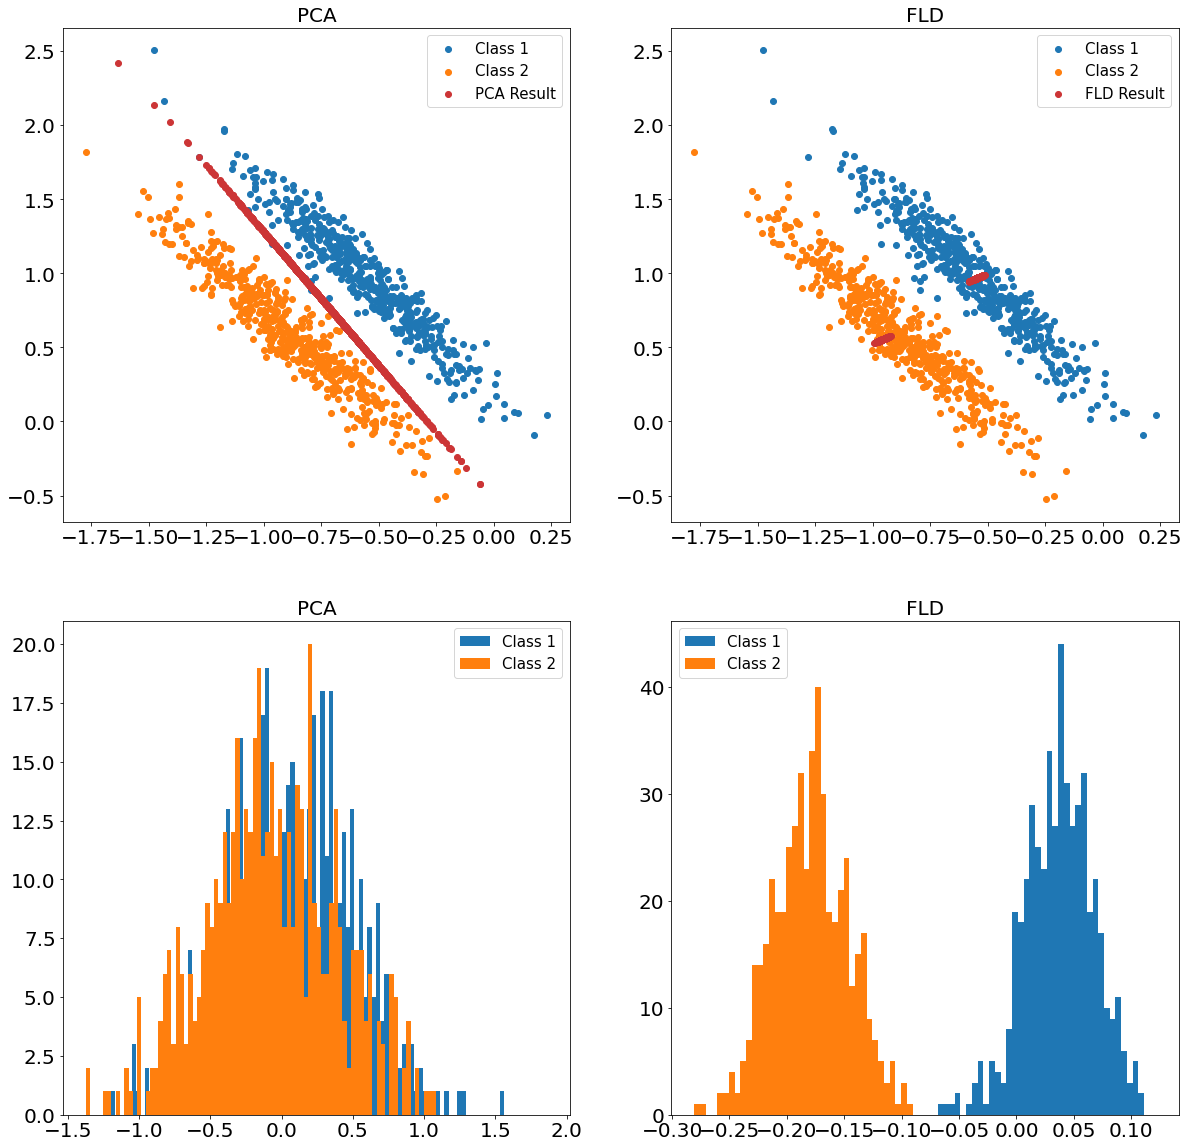

In [4]:
# FLD
my_fld = MyFLD(2, 1)
my_fld_pred_x = my_fld.fit_transform(x_list, y_list)
show_fld_x = my_fld_pred_x * my_fld.fisher_matrix + my_fld.mean_mat[np.array(y_list).reshape(-1)]

# sklearn pca
sklearn_pca = PCA(n_components=1)
sklearn_pca_pred_x = sklearn_pca.fit_transform(x_list)
show_pca_x = sklearn_pca_pred_x * sklearn_pca.components_[0] + sklearn_pca.mean_

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("PCA", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
pos_x_list = x_list[np.argwhere(y_list == 0).reshape(-1), :].copy()
neg_x_list = x_list[np.argwhere(y_list == 1).reshape(-1), :].copy()
plt.scatter(pos_x_list[:, 0], pos_x_list[:, 1], label="Class 1")
plt.scatter(neg_x_list[:, 0], neg_x_list[:, 1], label="Class 2")
plt.scatter(show_pca_x[:, 0], show_pca_x[:, 1], c="#cc3536", label="PCA Result")
plt.legend(fontsize=15)

plt.subplot(2, 2, 2)
plt.title("FLD", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
pos_x_list = x_list[np.argwhere(y_list == 0).reshape(-1), :].copy()
neg_x_list = x_list[np.argwhere(y_list == 1).reshape(-1), :].copy()
plt.scatter(pos_x_list[:, 0], pos_x_list[:, 1], label="Class 1")
plt.scatter(neg_x_list[:, 0], neg_x_list[:, 1], label="Class 2")
plt.scatter(show_fld_x[:, 0], show_fld_x[:, 1], c="#cc3536", label="FLD Result")
plt.legend(fontsize=15)

plt.subplot(2, 2, 3)
plt.title("PCA", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
binwidth = 0.03
pos_x_list = sklearn_pca_pred_x.reshape(-1)[np.argwhere(y_list == 0).reshape(-1)].copy()
plt.hist(pos_x_list, bins=np.arange(np.min(pos_x_list), np.max(pos_x_list), binwidth), label="Class 1")
neg_x_list = sklearn_pca_pred_x.reshape(-1)[np.argwhere(y_list == 1).reshape(-1)].copy()
plt.hist(neg_x_list, bins=np.arange(np.min(neg_x_list), np.max(neg_x_list), binwidth), label="Class 2")
plt.legend(fontsize=15)

plt.subplot(2, 2, 4)
plt.title("FLD", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

binwidth = 0.005
pos_x_list = my_fld_pred_x.reshape(-1)[np.argwhere(y_list == 0).reshape(-1)].copy()
plt.hist(pos_x_list, bins=np.arange(np.min(pos_x_list), np.max(pos_x_list), binwidth), label="Class 1")
neg_x_list = my_fld_pred_x.reshape(-1)[np.argwhere(y_list == 1).reshape(-1)].copy()
plt.hist(neg_x_list, bins=np.arange(np.min(neg_x_list), np.max(neg_x_list), binwidth), label="Class 2")
plt.legend(fontsize=15)

plt.show()

上图非常明显，PCA降维后两类混到了一起，而FLD降维后虽然类内数据点的可分性下降了，但是类间的可分性得到了保持